<h1>Ejemplo de residuos ponderados </h1>

Tomado de https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-90-computational-methods-in-aerospace-engineering-spring-2014/numerical-methods-for-partial-differential-equations/method-of-weighted-residuals/1690r-the-method-of-weighted-residuals/

**Transefencia de calor estacionaria en una barra.** 

Este problema puede ser modelado como como una EDP para la temperatura:
$(KT_x)_x=-f(x)$
donde K(x) es la conductividad térmica y f(x) la fuente de calor. Suponiendo una barra de L=2, conductividad térmica constante k=1. Y las temperaturas en el contorno T(1)=100=T(-1). La fuente de calor está dada por $f(x)=50e^x$. 
La solución analítica es $T=-50e^x + 50xsinh(1)+100+50cosh(1)$. Que gráficamente se ve así

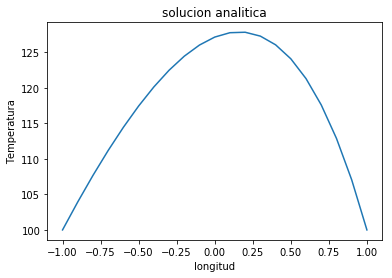

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-1,1.1,0.1)
Temp=-50*np.exp(x)+ 50*x*np.sinh(1)+100+50*np.cosh(1)
fig=plt.figure()
plt.ylabel("Temperatura")
plt.title("solucion analitica")
plt.xlabel("longitud")
plt.plot(x,Temp)

<h3> Método de colocación </h3>




con 1 elemento


<h3> Método de los residuos ponderados </h3>

Con 1 elemento


<h3> Elementos finitos con residuos ponderados </h3>



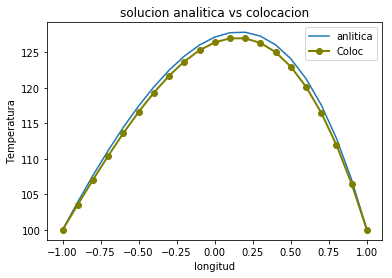

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-1,1.1,0.1)
Temp=-50*np.exp(x)+ 50*x*np.sinh(1)+100+50*np.cosh(1)
fig=plt.figure()
plt.ylabel("Temperatura")
plt.title("solucion analitica vs colocacion")
plt.xlabel("longitud")
plt.plot(x,Temp, label="anlitica")
#Solución de la EDP con el método de colocación
a_1=26.402
a_2=8.489
phi_1=(1+x)*(1-x)
phi_2=x*phi_1
T_coloc=100+a_1*(phi_1)+a_2*phi_2
plt.plot( x, T_coloc,marker='o', color='olive', linewidth=2, label="Coloc")
plt.legend()


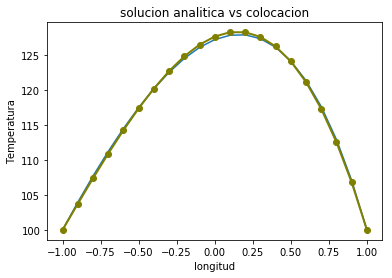

In [15]:
fig=plt.figure()
plt.ylabel("Temperatura")
plt.title("solucion analitica vs colocacion")
plt.xlabel("longitud")
plt.plot(x,Temp)
#Solución de la EDP con el método de colocación
a_3=27.591
a_4=8.945
T_gar=100+a_3*(phi_1)+a_4*phi_2
plt.plot( x, T_gar,marker='o', color='olive', linewidth=2)


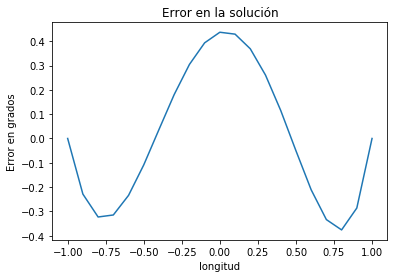

In [17]:
""""
Graficas del residuo y el error del método de residuos ponderados 
con 1 elemento
"""
Error=T_gar-Temp
Errorcoloc=T_coloc-Temp
plt.ylabel("Error en grados")
plt.title("Error en la solución")
plt.xlabel("longitud")
plt.plot(x,Error)

[16.88197206 13.44948299 10.22044821  7.21626519  4.4605818   1.97953299
 -0.1979977  -2.04008897 -3.51146235 -4.5731291  -5.182      -5.2904541
 -4.84586209 -3.79005962 -2.05876512  0.41906354  3.72194002  7.93663537
 13.15904642 19.49515556 27.06209142]


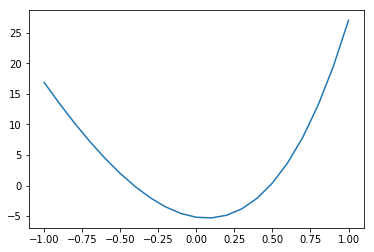

In [21]:
residue=-2*a_3-6*a_4*x+50*np.exp(x)
print(residue)
plt.plot(x,residue)

Ejercicio: Pasar a Python el siguiente código de MATLAB
<pre><code>
% FEM solver for d2T/dx2 + f = 0 where f = 50 exp(x)
%
% BCs: T(-1) = 100 and T(1) = 100.
%
% Note: the finite element degrees of freedom are
%       stored in the vector T.

% Number of elements
nElem = 10;
x = linspace(-1,1,nElem+1);

% Zero stiffness matrix
K = zeros(nElem+1, nElem+1);
F = zeros(nElem+1, 1);

% Loop over all elements and calculate stiffness and residuals
for elem = 1:nElem,

  n1 = elem;
  n2 = elem+1;

  x1 = x(n1);
  x2 = x(n2);

  dx = x2 - x1;

  % Add contribution to n1 weighted residual due to n1 function
  K(n1, n1) = K(n1, n1) - (1/dx);

  % Add contribution to n1 weighted residual due to n2 function
  K(n1, n2) = K(n1, n2) + (1/dx);

  % Add contribution to n2 weighted residual due to n1 function
  K(n2, n1) = K(n2, n1) + (1/dx);

  % Add contribution to n2 weighted residual due to n2 function
  K(n2, n2) = K(n2, n2) - (1/dx);

  % Add forcing term to n1 weighted residual
  F(n1) = F(n1) - (50*(exp(x2)-x2*exp(x1) + x1*exp(x1) - exp(x1))/dx);

  % Add forcing term to n2 weighted residual
  F(n2) = F(n2) - (50*(x2*exp(x2)-exp(x2)-x1*exp(x2)+exp(x1))/dx);

end


% Set Dirichlet conditions at x=-1
n1 = 1;
K(n1,:)    = zeros(size(1,nElem+1));
K(n1, n1) = 1.0;
F(n1)      = 100.0;


% Set Dirichlet conditions at x=1
n1 = nElem+1;
K(n1,:)    = zeros(size(1,nElem+1));
K(n1, n1) = 1.0;
F(n1)      = 100.0;


% Solve for solution
T = K\F;


% Plot solution
figure(1);
plot(x,T,'*-');
xlabel('x');
ylabel('T');

% For the exact solution, we need to use finer spacing to plot
% it correctly.  If we only plot it at the nodes of the FEM mesh,
% the exact solution would also look linear between the nodes.  To
% make sure there is always enough resolution relative to the FEM
% nodes, the size of the vector for plotting the exact solution is
% set to be 20 times the number of FEM nodes.
Npt = 20*nElem+1;
xe = linspace(-1,1,Npt);
Te = -50*exp(xe) + 50*xe*sinh(1) + 100 + 50*cosh(1);
hold on; plot(xe,Te); hold off;

% Plot the error.  To do this, calculate the error on the same
% set of points in which the exact solution was plot.  This
% requires that the location of the point xx(i) be found in the
% FEM mesh to construct the true solution at this point by linearly
% interpolating between the two nodes of the FEM mesh.

Terr(1) = T(1) - Te(1);
h = x(2)-x(1);
for i = 2:Npt-1,
  xxi = xe(i);
  Tei = Te(i);
  j = floor((xxi-xe(1))/h) + 1;
  x0 = x(j);
  x1 = x(j+1);
  T0 = T(j);
  T1 = T(j+1);
  xi = 2*(xxi - x0)/(x1-x0)-1;  % This gives xi between +/-1
  Ti = 0.5*(1-xi)*T0 + 0.5*(1+xi)*T1;
  Terr(i) = Ti - Tei;
end
Terr(Npt) = T(nElem+1) - Te(Npt);

figure(2);
plot(xe,Terr);
xlabel('x');
ylabel('Error');
</code></pre>

**Graficar**